In [40]:
import numpy as np
import matplotlib.pyplot as plt
import numpy
#20Hz
period_from_sensor = np.array([65535,217,100,75,66,62,61,62,63,64,63,63,63,63,64,63,63,63,62,63,63,63,62,62,63,63,64,62,63,62,63,63,64,62,62,62,63,63,64,63,63,63,63,63,64,63,64,66,71,76,81,87,94,101,112,116,65535])

pwm_max = 4500
u_max = 24 #v
omega_from_sensor_max = 36  #ras / sec

k_motor = omega_from_sensor_max / u_max
k_pwm = omega_from_sensor_max / pwm_max



In [38]:
class log_dt():
    def __init__(self):
        self.integral_dt = []
        self.omega_error_dt = []
        self.omega_out_dt = []
        self.signal_dt = []
    def add(self, integral, omega_error, omega_out, signal):
        self.integral_dt.append(integral)
        self.omega_error_dt.append(omega_error)
        self.omega_out_dt.append(omega_out)
        self.signal_dt.append(signal)

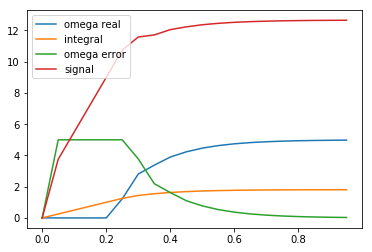

In [52]:
Tm = 0.2 / 3
integral = 0.0
diff = 0.0
omega_error = 0.0
prev_omega_error = 0.0
dt = 1.0/20 #0.05s

omega_idle = 0.0;
d_omega_idle = 0.0;
omega_idle_dt = [];


omega_out_ar = [];
omega_out = 0
d_omega_out = 0
signal = 0
omega_error = 0.

omega_target = 5
time = np.arange(0,1,dt)

kp = 0.4 #Tm / (Tz * k_motor)
ki = 7 #* numpy.sqrt(4)#1.0 / (Tz * k_motor)
kd = 0.

log = log_dt()
for i in time:
    log.add(integral,omega_error,omega_out,signal)

    omega_error = omega_target - omega_out
    integral += omega_error * dt
    diff = (omega_error - prev_omega_error) / dt
    prev_omega_error = omega_error
    
    signal = kp*omega_error + kd*diff + ki*integral
    d_omega_idle = (dt / Tm) * (k_motor * signal - omega_idle)
    omega_idle += d_omega_idle

    betta = 14
    alpha = 0.051
    if omega_idle < betta:
        omega_out = 0
    else:
        d_omega_out = (dt / alpha) * (omega_idle - omega_out - betta)
        omega_out += d_omega_out

plt.figure(0)
plt.plot(time, log.omega_out_dt, label = "omega real")
plt.plot(time, log.integral_dt, label = "integral")
plt.plot(time, log.omega_error_dt, label = "omega error")
plt.plot(time, log.signal_dt, label = "signal")
plt.legend()

